# Unevenly Lit images

In [1]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.exposure import equalize_hist, equalize_adapthist

sns.set_style("whitegrid")

Adjusting the image intensity values does not always work

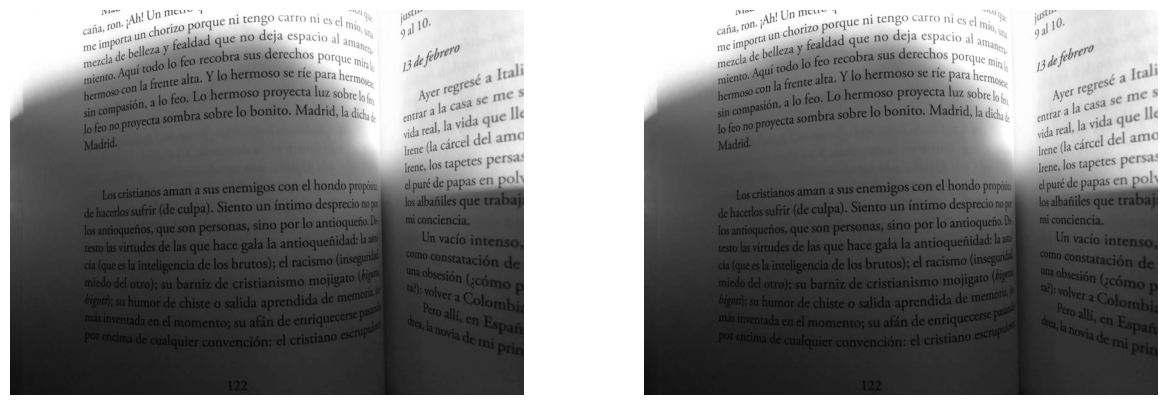

In [2]:
book = cv2.imread("./images/book.jpg", cv2.IMREAD_GRAYSCALE)
book_adjusted = book / book.max() * 255
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(book, cmap='gray', vmin=0, vmax=255)
axs[0].axis("off")
axs[1].imshow(book_adjusted, cmap='gray', vmin=0, vmax=255) 
axs[1].axis("off")
plt.show()

Performing histogram equalization

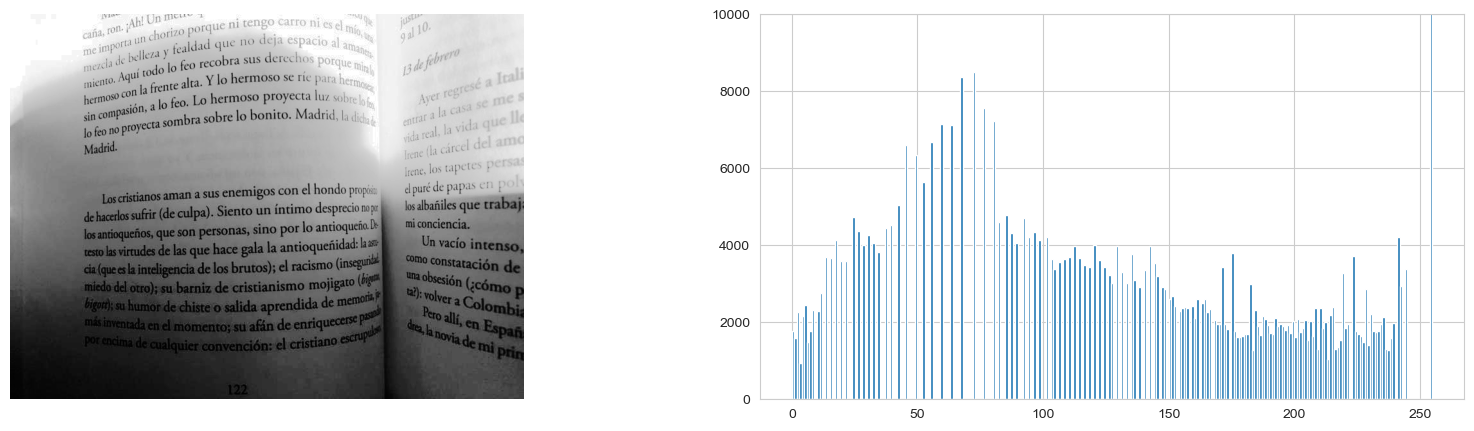

In [3]:
book_equalized = equalize_hist(book)
book_equalized = book_equalized / book_equalized.max() * 255
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].imshow(book_equalized, cmap='gray', vmin=0, vmax=255) # When using scalar data and no explicit norm, vmin and vmax define the data range that the colormap covers
axs[0].axis("off")
axs[1].hist(book_equalized.ravel(), bins=255, range=(0, 255))
axs[1].set_ylim(0, 1e4)
plt.show()

The text on the page is easier to read, so the equalization did improve the contrast between the text and paper.

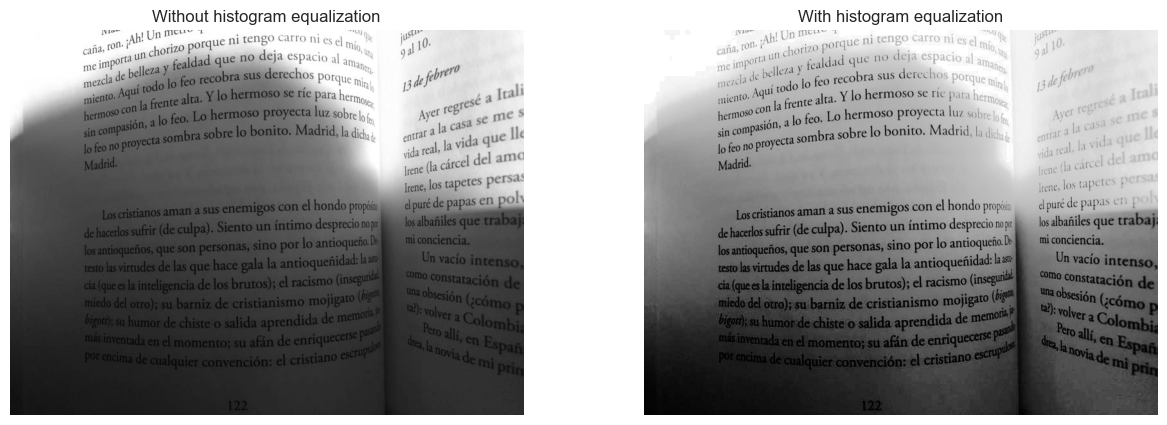

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(book, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Without histogram equalization")
axs[0].axis("off")
axs[1].imshow(book_equalized, cmap='gray', vmin=0, vmax=255) 
axs[1].set_title("With histogram equalization")
axs[1].axis("off")
plt.show()

The equalize_hist function equalizes the histogram of the entire image. Because different parts of this image have different distributions of intensities, it would likely benefit from adaptive histogram equalization. An adaptive method performs equalization locally rather than globally.

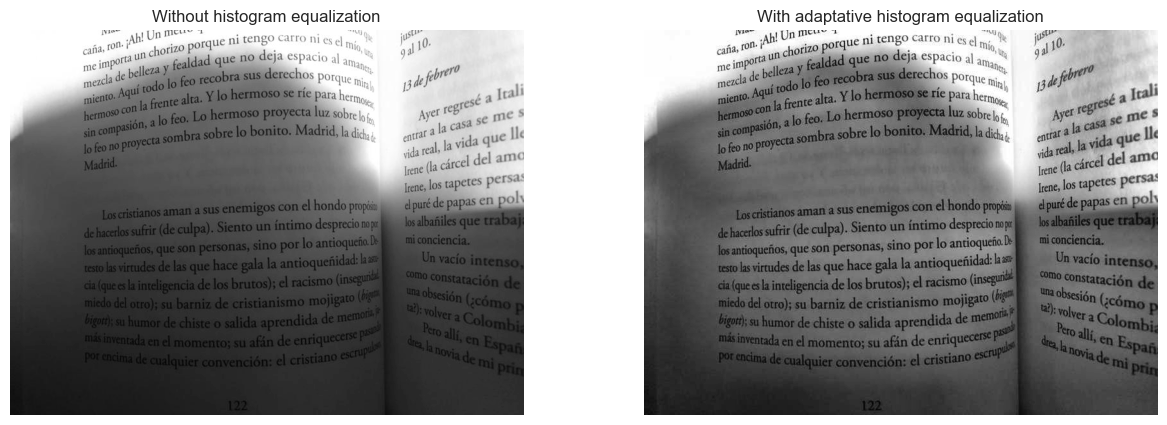

In [5]:
book_adapted = equalize_adapthist(book)
book_adapted = book_adapted / book_adapted.max() * 255

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(book, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Without histogram equalization")
axs[0].axis("off")
axs[1].imshow(book_adapted, cmap='gray', vmin=0, vmax=255) 
axs[1].set_title("With adaptative histogram equalization")
axs[1].axis("off")
plt.show()